<a href="https://colab.research.google.com/github/Tara-Sophia/MachineLearning_Class/blob/main/2487_Assignment4_2122_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

The assignment 4 contains 3 questions and the due date is May 9th (Sunday) 23:59PM.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
#from keras.optimizers import SGD

%matplotlib inline

## Question 1 Celonis Automation Bootcamp (20 points)

In this question, you are simply asked to complete the bootcamp and upload the badge or compleion proof. 


please see moodle

## Question 2 Training a deep neural network (80 points)

Practice training a deep neural network on the CIFAR10 image dataset:


In [12]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

### Question 2.1 (10 points) 

Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data() (see code below). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 5000 of which is for validation, 10,000 for testing) with 10 classes using sparse_categorical_crossentropy loss function , so you’ll need a softmax output layer with 10 neurons. 

Train the model for 100 epochs, explain whether the model will experience overfitting. 

In [ ]:
X_train.shape

(45000, 32, 32, 3)

In [13]:
# setting class names
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
X_train=X_train/255.0
X_train.shape
X_valid=X_valid/255.0
X_valid.shape


(5000, 32, 32, 3)

In [ ]:
model = keras.models.Sequential()
#convert each input image into a 1D array
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
# Hidden layers 20
model.add(keras.layers.Dense(100, activation="relu")) #1
model.add(keras.layers.Dense(100, activation="relu")) #2
model.add(keras.layers.Dense(100, activation="relu")) #3
model.add(keras.layers.Dense(100, activation="relu")) #4
model.add(keras.layers.Dense(100, activation="relu")) #5
model.add(keras.layers.Dense(100, activation="relu")) #6
model.add(keras.layers.Dense(100, activation="relu")) #7
model.add(keras.layers.Dense(100, activation="relu")) #8
model.add(keras.layers.Dense(100, activation="relu")) #9
model.add(keras.layers.Dense(100, activation="relu")) #10
model.add(keras.layers.Dense(100, activation="relu")) #11
model.add(keras.layers.Dense(100, activation="relu")) #12
model.add(keras.layers.Dense(100, activation="relu")) #13
model.add(keras.layers.Dense(100, activation="relu")) #14
model.add(keras.layers.Dense(100, activation="relu")) #15
model.add(keras.layers.Dense(100, activation="relu")) #16
model.add(keras.layers.Dense(100, activation="relu")) #17
model.add(keras.layers.Dense(100, activation="relu")) #18
model.add(keras.layers.Dense(100, activation="relu")) #19
model.add(keras.layers.Dense(100, activation="relu")) #20
#output layer with 10 for 10 image classes
model.add(keras.layers.Dense(10, activation="softmax"))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [ ]:
# compile the model to specify loss function and optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 17s 10ms/step - loss: 2.0951 - accuracy: 0.1765 - val_loss: 2.0341 - val_accuracy: 0.2008
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0180 - accuracy: 0.2045 - val_loss: 2.0103 - val_accuracy: 0.2186
Epoch 3/100
1407/1407 [==============================] - 13s 10ms/step - loss: 2.0149 - accuracy: 0.2058 - val_loss: 2.0816 - val_accuracy: 0.1820
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0022 - accuracy: 0.2041 - val_loss: 2.0525 - val_accuracy: 0.1996
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9803 - accuracy: 0.2151 - val_loss: 1.9820 - val_accuracy: 0.2276
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9667 - accuracy: 0.2187 - val_loss: 1.9641 - val_accuracy: 0.2216
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.9652 - accuracy: 0.2223 - val_loss: 1.

In [ ]:
print('Validation', model.evaluate(X_valid, y_valid))
print('Train set', model.evaluate(X_train, y_train))
print('Test set', model.evaluate(X_test, y_test))

157/157 [==============================] - 1s 4ms/step - loss: 1.8889 - accuracy: 0.2928
Validation [1.888873815536499, 0.29280000925064087]
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8671 - accuracy: 0.2846
Train set [1.8670706748962402, 0.28459998965263367]
313/313 [==============================] - 1s 4ms/step - loss: 1.8862 - accuracy: 0.2766
Test set [1.8862093687057495, 0.2766000032424927]


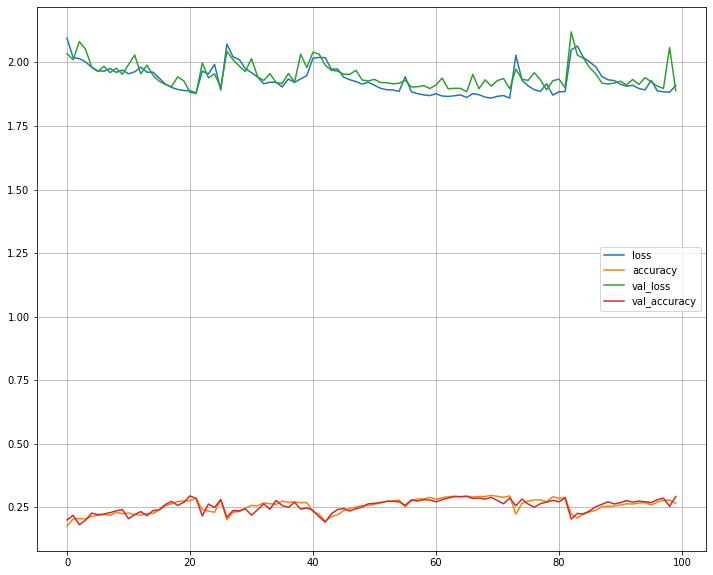

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12, 10))
plt.grid(True)

plt.show()


### Explanation

We can see that our training and validation lines are very near each other, which is a good sign. It means that we are not having overfitting, which would be the case if the lines are fare seperated. Overall we see a small decreasing loss trend, with many variability, but an overall decreasing trend. So we can conclude, that the model seems to generalize well to the validation set. But We are seeing a very low accuracy of about 27% -29% for validation, test and train set, which is very low and not good.

### Question 2.2 (10 points)

Try reduce the overfitting with weight regularization. You can try to add a L2-norm penalty term as the kernel_regularizer. Repeat the previous training process and explain whether regularization helps achieve a better result.

In [14]:
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
                           activation="relu",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model_reg = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    RegularizedDense(100), #1
    RegularizedDense(100), #2
    RegularizedDense(100), #3
    RegularizedDense(100), #4
    RegularizedDense(100), #5 
    RegularizedDense(100), #6
    RegularizedDense(100), #7
    RegularizedDense(100), #8
    RegularizedDense(100), #9
    RegularizedDense(100), #10
    RegularizedDense(100), #11
    RegularizedDense(100), #12
    RegularizedDense(100), #13
    RegularizedDense(100), #14
    RegularizedDense(100), #15
    RegularizedDense(100), #16
    RegularizedDense(100), #17
    RegularizedDense(100), #18
    RegularizedDense(100), #19
    RegularizedDense(100), #20
    RegularizedDense(10, activation="softmax")
    
])

model_reg.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

history_reg = model_reg.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))


Epoch 1/100
1407/1407 [==============================] - 10s 6ms/step - loss: 3.0137 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0920
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3028 - val_a

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_63 (Dense)            (None, 100)               307300    
                                                                 
 dense_64 (Dense)            (None, 100)               10100     
                                                                 
 dense_65 (Dense)            (None, 100)               10100     
                                                                 
 dense_66 (Dense)            (None, 100)               10100     
                                                                 
 dense_67 (Dense)            (None, 100)               10100     
                                                                 
 dense_68 (Dense)            (None, 100)              

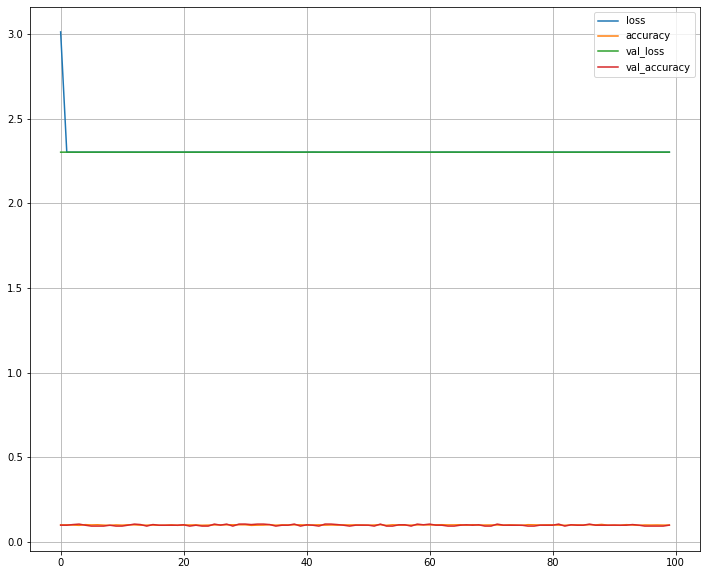

In [15]:
pd.DataFrame(history_reg.history).plot(figsize=(12, 10))
plt.grid(True)

plt.show()

In [ ]:
print('Validation', model_reg.evaluate(X_valid, y_valid))
print('Train set', model_reg.evaluate(X_train, y_train))
print('Test set', model_reg.evaluate(X_test, y_test))

157/157 [==============================] - 0s 3ms/step - loss: 2.3029 - accuracy: 0.0976
Validation [2.302945375442505, 0.09759999811649323]
1407/1407 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.1003
Train set [2.3026082515716553, 0.10026666522026062]
313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Test set [2.302639961242676, 0.10000000149011612]


### Explanation

Here we can see that the model drops it losses drastically after 2-5 epochs, and then the losses stay constant. Also the accuracy stays constant, we dont see the fluctations we saw before in the first model. Also the train and validation set are super close together, basically on the same line, showing that there is no overfitting. But this model has even a lower accuracy between 9%-10% , which is far less compared to the first model having more than 27%. Furthermore our losses are also higher ( about double, compared to the previous model)

### Question 2.3 (10 points)

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [ ]:
model_batch = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #1
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #2
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #3
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #4
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #5
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #6
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #7
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #8
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #9
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #10
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #11
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #12
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #13
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #14
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #15
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #16
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #17
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #18
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #19
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"), #20
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
    ])
model_batch.summary()
model_batch.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



history_model_batch = model_batch.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dense_42 (Dense)            (None, 100)               307300    
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

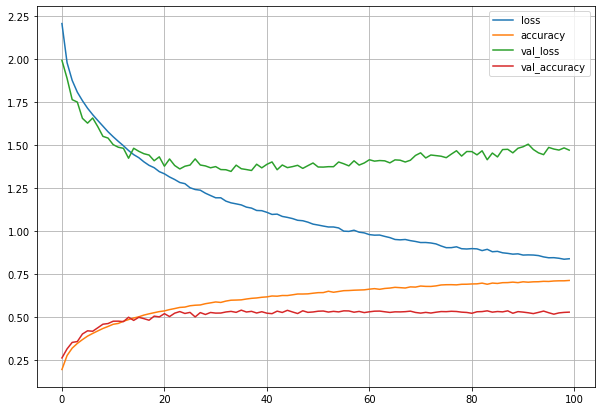

In [ ]:
pd.DataFrame(history_model_batch.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [ ]:
print('Validation', model_batch.evaluate(X_valid, y_valid))
print('Train set', model_batch.evaluate(X_train, y_train))
print('Test set', model_batch.evaluate(X_test, y_test))


157/157 [==============================] - 1s 4ms/step - loss: 1.4701 - accuracy: 0.5274
Validation [1.4701074361801147, 0.527400016784668]
1407/1407 [==============================] - 9s 7ms/step - loss: 0.5791 - accuracy: 0.8121
Train set [0.5791311860084534, 0.8121333122253418]
313/313 [==============================] - 1s 5ms/step - loss: 1.4919 - accuracy: 0.5234
Test set [1.4918842315673828, 0.5234000086784363]


### Explanation: 

Here we can clearly see that the loss curve of the train set is decreasing very strongly and also the accuracy of the train set is increasing very fast, but in both cases ( accuracy and loss) after the 20th epoch, the train and valid set diverges. The validation set, stops decreasing for the loss, and stops increasing for the accuracy - its stays parallel, like before. That shows that the model is overfitting here and not generalizing well for the valid set. 
Nevertheless, it is to say that the accuracy has increased drastically compared to before. Now we are seeing an accuracy score of 52% for the test and validation set, and 80% for the training set ( which shows that this model is overfitting since these score diverge so much). Compared to the 10% or 27% accuracy we saw before, this is way better. THe loss on the other hand is also lower than from the both models before. Here again we see a far lower loss for the train set.But the results is what we expect, since normalizing the inputs of the layer has an effect on the training of the model, dramatically reducing the number of epochs required, which is exactly what we see, that after 20 epochs our model starts overfitting. --> learning curve is converging way faster and it produces a way better model.

But we are also seeing that each epoch takes far longer than for the models before.

### Question 2.4 (10 points)

Try regularizing the model with dropout. Then, without retraining your model, see if you can achieve better accuracy using different rate of Dropout.

In [ ]:
model_drop = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #1
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #2
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #3
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #4
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #5
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #6
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #7
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #8
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #9
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #10
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #11
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #12
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #13
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #14
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #15
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #16
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #17
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #18
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #19
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"), #20
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model_drop.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_drop = model_drop.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))


Epoch 1/100
1407/1407 [==============================] - 19s 11ms/step - loss: 2.2168 - accuracy: 0.1465 - val_loss: 2.1202 - val_accuracy: 0.1822
Epoch 2/100
1407/1407 [==============================] - 13s 10ms/step - loss: 2.1523 - accuracy: 0.1639 - val_loss: 2.1504 - val_accuracy: 0.1584
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.1435 - accuracy: 0.1666 - val_loss: 2.0977 - val_accuracy: 0.1844
Epoch 4/100
1407/1407 [==============================] - 15s 11ms/step - loss: 2.1759 - accuracy: 0.1588 - val_loss: 2.1380 - val_accuracy: 0.1904
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.1529 - accuracy: 0.1666 - val_loss: 2.1055 - val_accuracy: 0.2002
Epoch 6/100
1407/1407 [==============================] - 15s 10ms/step - loss: 2.1383 - accuracy: 0.1647 - val_loss: 2.1420 - val_accuracy: 0.1642
Epoch 7/100
1407/1407 [==============================] - 15s 10ms/step - loss: 2.1575 - accuracy: 0.1621 - val_loss: 2.

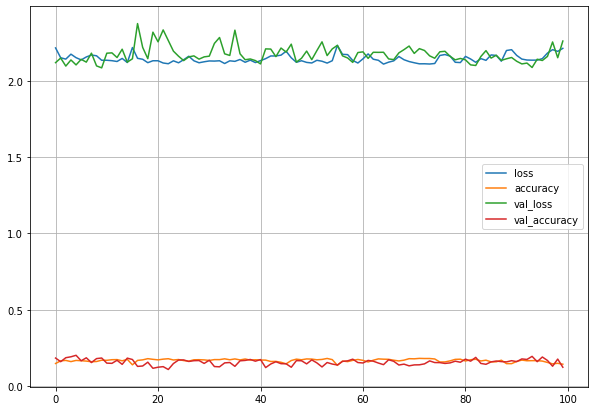

In [ ]:
pd.DataFrame(history_drop.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [ ]:
print('Validation', model_drop.evaluate(X_valid, y_valid))
print('Train set', model_drop.evaluate(X_train, y_train))
print('Test set', model_drop.evaluate(X_test, y_test))

157/157 [==============================] - 0s 3ms/step - loss: 2.2621 - accuracy: 0.1218
Validation [2.262120008468628, 0.121799997985363]
1407/1407 [==============================] - 5s 3ms/step - loss: 2.2616 - accuracy: 0.1231
Train set [2.2615549564361572, 0.1231333315372467]
313/313 [==============================] - 1s 3ms/step - loss: 2.2621 - accuracy: 0.1221
Test set [2.262064218521118, 0.12210000306367874]


### Explaination:
Here again, we are seeing that, the scores for loss and accuracy are not increasing /decreasing, instead staying the same more or less. THe lines from train and validation set are quite close togethter showing that the model does not overfit, but also does not improve. Furthermore accuracy scores stay quite low.

In [ ]:
dropoptions = np.linspace(0,0.8,11)

for value in dropoptions:
    


    model_drop_two = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[32, 32, 3]),
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #1
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(100, activation="relu"), #2
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #3
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #4
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #5
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #6
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #7
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #8
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #9
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #10
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #11
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #12
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #13
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #14
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #15
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #16
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #17
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #18
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #19
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(100, activation="relu"), #20
        keras.layers.Dropout(rate=value),
        keras.layers.Dense(10, activation="softmax")
    ])

    model_drop_two.compile(loss="sparse_categorical_crossentropy",
                  optimizer='Adam',
                  metrics=["accuracy"])
    print(value)
    print('Validation', model_drop_two.evaluate(X_valid, y_valid))
    print('Train set', model_drop_two.evaluate(X_train, y_train))
    print('Test set', model_drop_two.evaluate(X_test, y_test))
    print("****************")

0.0
157/157 [==============================] - 1s 3ms/step - loss: 2.3074 - accuracy: 0.1040
Validation [2.3074285984039307, 0.10400000214576721]
1407/1407 [==============================] - 4s 3ms/step - loss: 2.3075 - accuracy: 0.1035
Train set [2.3074517250061035, 0.10346666723489761]
313/313 [==============================] - 1s 3ms/step - loss: 2.3075 - accuracy: 0.1070
Test set [2.3074886798858643, 0.10700000077486038]
****************
0.08
157/157 [==============================] - 1s 3ms/step - loss: 2.3251 - accuracy: 0.1144
Validation [2.3251259326934814, 0.1143999993801117]
1407/1407 [==============================] - 5s 3ms/step - loss: 2.3259 - accuracy: 0.1084
Train set [2.32588529586792, 0.1083555519580841]
313/313 [==============================] - 1s 3ms/step - loss: 2.3258 - accuracy: 0.1080
Test set [2.325800657272339, 0.1080000028014183]
****************
0.16
157/157 [==============================] - 1s 3ms/step - loss: 2.3493 - accuracy: 0.0972
Validation [2.34931

### Explanations:

We can conclude, that the accuracy does not increase by much if we change between different rates, instead it stays in the range between 9% and 11%

### Question 2.5 (10 points) 

Add Earlystopping to the model and save the model at the early stopping epoch using the callbacks. 

Last, load the model and evaluate on the test set.

In [ ]:
model_drop.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("dropout_keras_model.h5", save_best_only=True)
early_stopp = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history_e = model_drop.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopp])

model_drop = keras.models.load_model("dropout_keras_model.h5") # rollback to best model


print('Validation', model_drop_two.evaluate(X_valid, y_valid))
print('Train set', model_drop_two.evaluate(X_train, y_train))
print('Test set', model_drop_two.evaluate(X_test, y_test))

Epoch 1/100
1407/1407 [==============================] - 18s 11ms/step - loss: 2.1763 - accuracy: 0.1581 - val_loss: 2.1287 - val_accuracy: 0.1700
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.1690 - accuracy: 0.1654 - val_loss: 2.1661 - val_accuracy: 0.1672
Epoch 3/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.1873 - accuracy: 0.1578 - val_loss: 2.2693 - val_accuracy: 0.1280
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.2511 - accuracy: 0.1251 - val_loss: 2.1149 - val_accuracy: 0.1820
Epoch 5/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.1688 - accuracy: 0.1585 - val_loss: 2.1127 - val_accuracy: 0.1848
Epoch 6/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.1895 - accuracy: 0.1455 - val_loss: 2.1667 - val_accuracy: 0.1614
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.1812 - accuracy: 0.1513 - val_loss: 2.1418 

### Explanation:
 like we were able to see, the best model is after 19 epochs. That matches with what we saw on the graph before.

### Question 2.6 Convolutional Neural Network (15 points)

Now, let's define the Convolutional Neural Network. 

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model using the same compilation configuration and report your test accuracy. 

In [ ]:

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_valid = X_valid.astype('float32') 

In [ ]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3), strides=1,
                           padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3), strides=1,
                           padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3), strides=1,
                           padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=3),
    keras.layers.Flatten(),
    keras.layers.Dense(units=120, activation='relu'),
    keras.layers.Dense(units=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax')
    
])    



In [ ]:
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_model_cnn = model_cnn.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 106s 73ms/step - loss: 2.0373 - accuracy: 0.2524 - val_loss: 1.5769 - val_accuracy: 0.4350
Epoch 2/100
1407/1407 [==============================] - 110s 78ms/step - loss: 1.6051 - accuracy: 0.4158 - val_loss: 1.3948 - val_accuracy: 0.4872
Epoch 3/100
1407/1407 [==============================] - 110s 78ms/step - loss: 1.4337 - accuracy: 0.4972 - val_loss: 1.2852 - val_accuracy: 0.5410
Epoch 4/100
1407/1407 [==============================] - 96s 69ms/step - loss: 1.3070 - accuracy: 0.5504 - val_loss: 1.2157 - val_accuracy: 0.5888
Epoch 5/100
1407/1407 [==============================] - 82s 59ms/step - loss: 1.2052 - accuracy: 0.5893 - val_loss: 1.1227 - val_accuracy: 0.6066
Epoch 6/100
1407/1407 [==============================] - 77s 55ms/step - loss: 1.1130 - accuracy: 0.6224 - val_loss: 1.1026 - val_accuracy: 0.6300
Epoch 7/100
1407/1407 [==============================] - 728s 518ms/step - loss: 1.0459 - accuracy: 0.6471 - val_lo

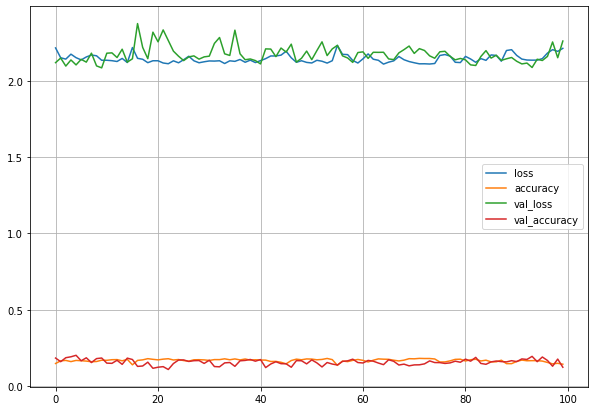

In [ ]:
pd.DataFrame(history_drop.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [ ]:
print('Validation', model_drop_two.evaluate(X_valid, y_valid))
print('Train set', model_drop_two.evaluate(X_train, y_train))
print('Test set', model_drop_two.evaluate(X_test, y_test))

157/157 [==============================] - 1s 3ms/step - loss: 2.3106 - accuracy: 0.1008
Validation [2.3105549812316895, 0.10080000013113022]
1407/1407 [==============================] - 4s 3ms/step - loss: 2.3116 - accuracy: 0.0972
Train set [2.3116261959075928, 0.09724444150924683]
313/313 [==============================] - 1s 3ms/step - loss: 2.3120 - accuracy: 0.0990
Test set [2.3120334148406982, 0.0989999994635582]


### Explanation:
Here again we can clearly see that the model is not improving, having a relatively constant accuracy and with fluctations also a relatively constant loss function. The accuracy of the validation and training set is very close to each other, signing that there is no overfitting. Furthermore we are seeing again a low accuracy between 9%-10%.

The test accuracy is 9,8%

### Question 2.7 Transfer learning (15 points)

In this question, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks. 

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing VGG16 network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below: 

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

Estimate the model using the same compilation configuration and report the test accuracy. 

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models

In [5]:


## Loading VGG16 model
def load_model():
    
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=[32, 32, 3])
    return base_model

def non_trainable(model):
    model.trainable = False ## Not trainable weights



def all_together(model):
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(10, activation='softmax')
    model_vg = keras.Sequential([
    model,
    flatten_layer,
    dense_layer_1,
    prediction_layer])
    return model_vg
    

In [6]:
#call everything
model_vgg16 = load_model()
non_trainable(model_vgg16)
print(model_vgg16.summary())
model_vgg16 = all_together(model_vgg16)
# compile
model_vgg16.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model_vgg16_history= model_vgg16.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

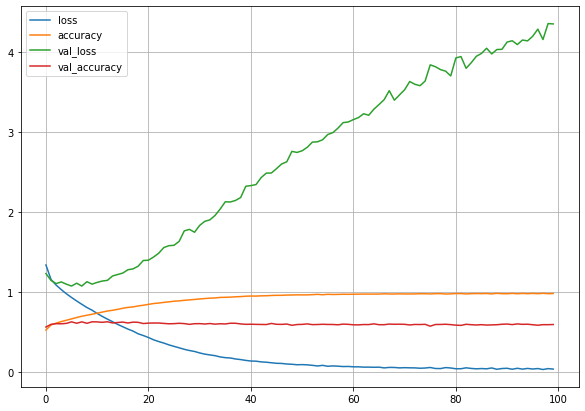

In [7]:
pd.DataFrame(model_vgg16_history.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [ ]:
#sum(model_vgg16.history['accuracy'])/ len(model_vgg16.history['accuracy'])

0.9197811132669449

In [9]:

print('Validation', model_vgg16.evaluate(X_valid, y_valid))
print('Train set', model_vgg16.evaluate(X_train, y_train))
print('Test set', model_vgg16.evaluate(X_test, y_test))

157/157 [==============================] - 2s 10ms/step - loss: 4.3560 - accuracy: 0.5980
Validation [4.355959415435791, 0.5979999899864197]
1407/1407 [==============================] - 13s 9ms/step - loss: 0.0386 - accuracy: 0.9864
Train set [0.03861001878976822, 0.9864000082015991]
313/313 [==============================] - 3s 10ms/step - loss: 1593.0345 - accuracy: 0.3179
Test set [1593.0345458984375, 0.31790000200271606]
